In [69]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.special as sps
import scipy.integrate as spi

lm  = 1.0
k   = 2.0*np.pi/lm 
lim = 4.0*lm

xv,yv = lim*np.linspace(-1,1,500), lim*np.linspace(-1,1,500)
X,Y = np.meshgrid(xv,yv)

def plane_wave(x,y):
    r = np.sqrt(x**2 + y**2)
    return np.exp(1j*k*x)

def expansion(x,y):
    Nmax    = 20
    approx  = np.zeros_like(x, dtype=complex)
    z       = x+1j*y 
    r       = np.abs(z)
    theta   = np.angle(z)
    for n in np.arange(-Nmax, Nmax+1):
        approx += (1j)**n * sps.jv(n, k*r) * np.exp(1j*n*theta)
    return approx


In [70]:
exact       = plane_wave(X,Y)
approx      = expansion(X,Y)
error       = np.abs(exact - approx)

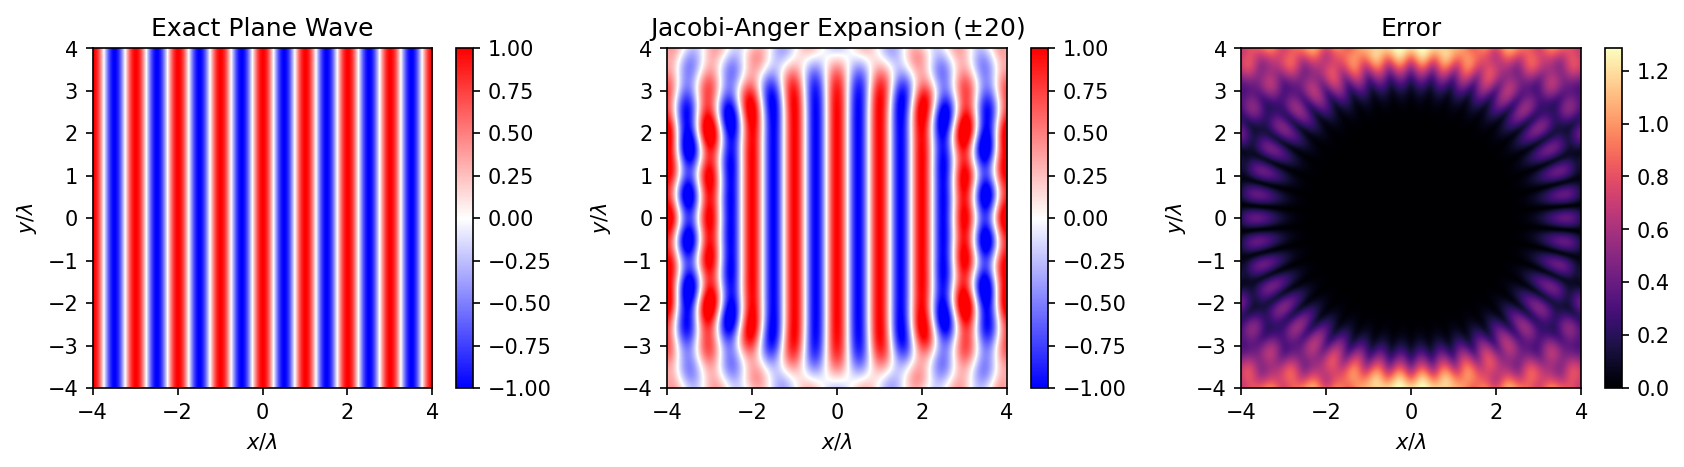

In [71]:
fig, axs = plt.subplots(1,3,dpi=150, figsize=(14,3))

im0 = axs[0].imshow(np.real(exact), origin="lower", extent=(-lim, lim, -lim, lim), vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(im0, ax=axs[0])
axs[0].set_title("Exact Plane Wave")

im1 = axs[1].imshow(np.real(approx), origin="lower", extent=(-lim, lim, -lim, lim), vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(im1, ax=axs[1])
axs[1].set_title("Jacobi-Anger Expansion ($\\pm20$)")

im2 = axs[2].imshow(error, origin="lower", extent=(-lim, lim, -lim, lim), cmap="magma")
fig.colorbar(im2, ax=axs[2])
axs[2].set_title("Error")

for ax in axs:
    ax.set_xlabel("$x/\\lambda$")
    ax.set_ylabel("$y/\\lambda$")

# plt.savefig("ja2.png", bbox_inches="tight")

plt.show()

In [56]:
integrand_r     = lambda theta, z: np.real( np.exp(1j*z*np.cos(theta)) )
integrand_i     = lambda theta, z: np.imag( np.exp(1j*z*np.cos(theta)) )
bessel0         = lambda z: 1.0/(2.0*np.pi)*( spi.quad(integrand_r, 0.0, 2.0*np.pi, args=(z))[0] + 1j*spi.quad(integrand_i, 0.0, 2.0*np.pi, args=(z))[0] )

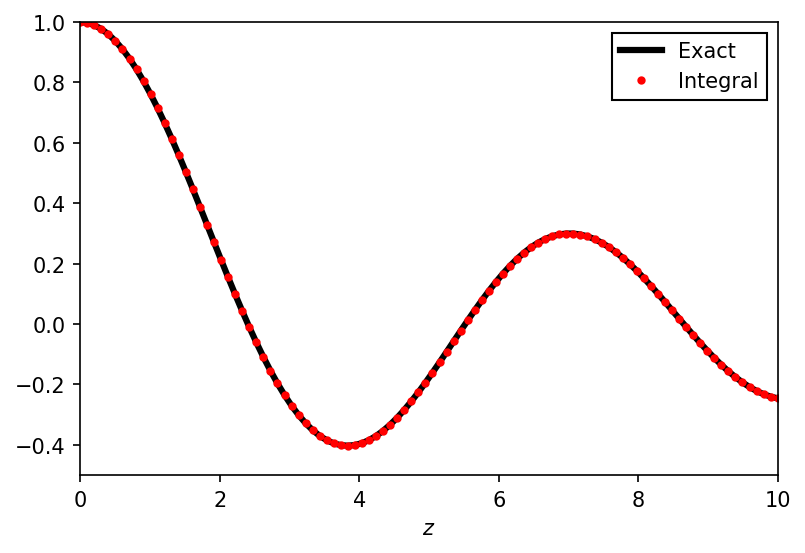

In [72]:
zv = np.linspace(0, 10, 100)

plt.figure(dpi=150)
plt.plot(zv, np.real( sps.jv(0, zv) ), 'k-', lw=3, label="Exact")
bessel_approx = [np.real(bessel0(z)) for z in zv]
plt.plot(zv, bessel_approx, 'r.', label="Integral")

plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.xlabel("$z$")
plt.xlim(zv[0], zv[-1])
plt.ylim(-0.5, 1)

# plt.savefig("ja3.png", bbox_inches="tight")

plt.show()